Q1:. Use the “pima-indians-diabetes.csv” dataset and note down the meta information.




The dataset consists of 768 observations and 8 numerical independent variables.

The target variable is specified as "outcome";

1 diabetes test result being positive, 0 indicates negative.

Pregnancies: Number of times pregnant
Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
BloodPressure: Diastolic blood pressure (mm Hg)
SkinThickness: Triceps skin fold thickness (mm)
Insulin: 2-Hour serum insulin (mu U/ml)
BMI: Body mass index (weight in kg/(height in m)^2)
DiabetesPedigreeFunction: Diabetes pedigree function
Age: Age (years)
Outcome: Class variable ( 0 - 1)

In [191]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [192]:
#loading the dataset
diabetes=pd.read_csv("/content/diabetes.csv")

In [193]:
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [194]:
#checking for null values
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Q2:Compute mean & standard deviation , tabulate and visualize the age of the patients.


In [195]:
#calculating average value
mean=diabetes['Age'].mean()
print('The mean value of Age is: ' + str(mean))

The mean value of Age is: 33.240885416666664


In [196]:
#calculating standard devaiation
stdev=diabetes['Age'].std()
print('The standard deviation value of Age is: ' + str(stdev))

The standard deviation value of Age is: 11.76023154067868


In [197]:
#tabulating 'Age' attribute
age_df=pd.DataFrame(diabetes, columns = ['Age'])
age_df.head()

,Age
0,50
1,31
2,32
3,21
4,33


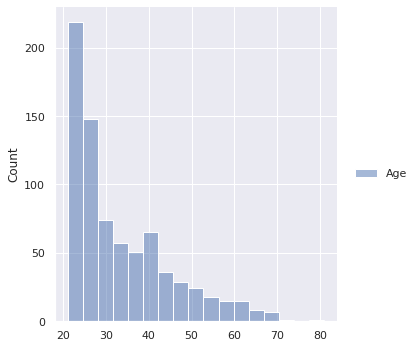

In [198]:
#visualizing Age use displot
sns.displot(age_df)

Q3: Analyze and tabulate the relationship of age, BMI of patients with respect to the class.

In [199]:
#creating dataframe consisting of 'Age' and 'Outcome' as the attributes
df2=pd.DataFrame(diabetes, columns = ['Age', 'Outcome'])

In [200]:
cr1= df2.groupby('Outcome')
cr1.first()

,Age
Outcome,
0,31
1,50


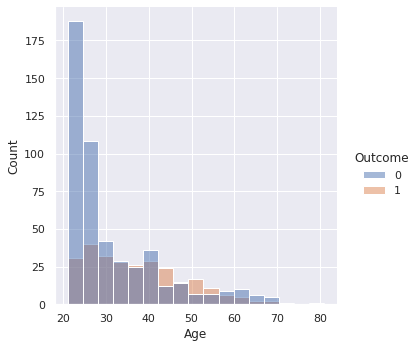

In [201]:
#visualizing 'Age' with respect to the class labels
sns.displot(x="Age", data=diabetes, hue="Outcome")

In [202]:
#creating dataframe consisting of 'BMI' and 'Outcome' as the attributes
df3=pd.DataFrame(diabetes, columns = ['BMI', 'Outcome'])

In [203]:
cr2= df3.groupby('Outcome')
cr2.first()

,BMI
Outcome,
0,26.6
1,33.6


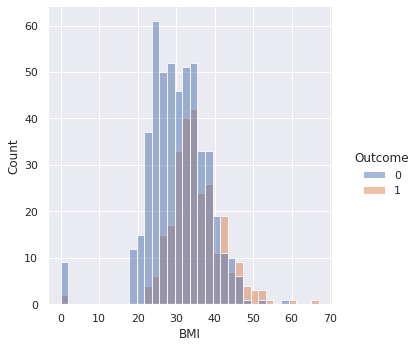

In [204]:
#visualizing 'BMI' with respect to the class labels
sns.displot(x="BMI", data=diabetes, hue="Outcome")

Q4:Tabulate the class label and comment on whether the classes are balanced.


In [205]:
#tabulating the 'class label'
df4=pd.DataFrame(diabetes, columns = ['Outcome'])
df4.head()

,Outcome
0,1
1,0
2,1
3,0
4,1


In [206]:
df4.describe()

,Outcome
count,768.000000
mean,0.348958
std,0.476951
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [207]:
pd.crosstab(diabetes['Outcome'],diabetes['Outcome'])

Outcome,0,1
Outcome,,
0,500,0
1,0,268


Inference: Clearly we have 268 positive instances and 500 negative instances, hencethe class labels are not at all equal

Q5: Use the data set to build a logistic regression model (using sklearn) and predict the class label. Divide 
the dataset into training and test set (70,30) using train_test_split method in sklearn.

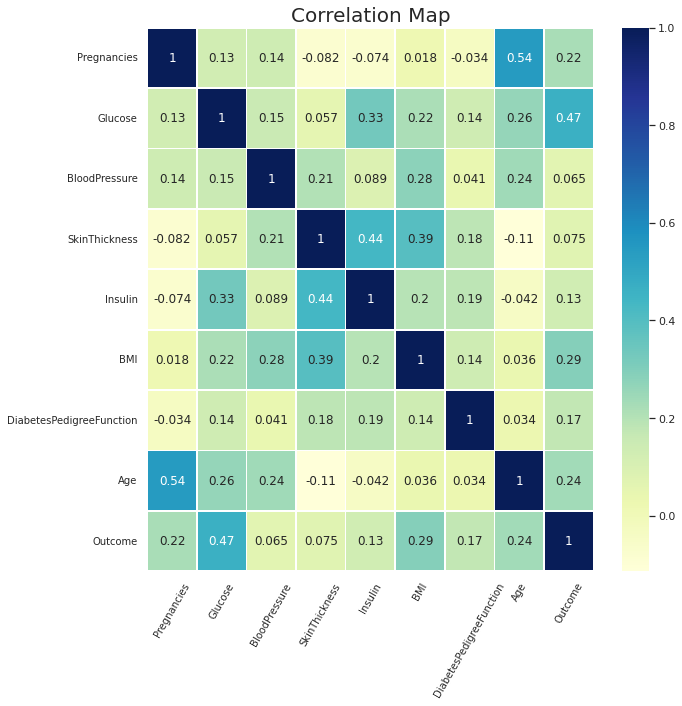

In [208]:
def correlated_map(dataframe, plot=False):
    corr = dataframe.corr()
    if plot:
        sns.set(rc={'figure.figsize': (10, 10)})
        sns.heatmap(corr, cmap="YlGnBu", annot=True, linewidths=.7)
        plt.xticks(rotation=60, size=10)
        plt.yticks(size=10)
        plt.title('Correlation Map', size=20)
        plt.show()

correlated_map(diabetes, plot=True)

In [209]:
corr_data =diabetes.corr()

In [210]:
corr_data['Outcome']

Pregnancies                 0.221898
Glucose                     0.466581
BloodPressure               0.065068
SkinThickness               0.074752
Insulin                     0.130548
BMI                         0.292695
DiabetesPedigreeFunction    0.173844
Age                         0.238356
Outcome                     1.000000
Name: Outcome, dtype: float64

Inference:print("Here plas(Glucose) and mass(BMI) has highest correlation with respect to class so we have to take these attributes")

In [211]:

X = diabetes[['BMI','Glucose']]
y = diabetes['Outcome']

In [212]:
X.head()

,BMI,Glucose
0,33.6,148
1,26.6,85
2,23.3,183
3,28.1,89
4,43.1,137


In [213]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [214]:
#splitting the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,shuffle= True, random_state = 0)

In [215]:
#conversion to numpy array

#for training dataset
X_train= np.asarray(X_train)
y_train= np.asarray(y_train)

#for testing dataset
X_test= np.asarray(X_test)
y_test= np.asarray(y_test)

In [216]:
print(f'training set size: {X_train.shape[0]} samples \ntest set size: {X_test.shape[0]} samples')

training set size: 537 samples 
test set size: 231 samples


In [217]:
from sklearn.preprocessing import Normalizer
scaler= Normalizer().fit(X_train) # the scaler is fitted to the training set
normalized_x_train= scaler.transform(X_train) # the scaler is applied to the training set
normalized_x_test= scaler.transform(X_test) # the scaler is applied to the test set

In [218]:
print('x train before Normalization')
print(X_train[0:5])
print('\nx train after Normalization')
print(normalized_x_train[0:5])

x train before Normalization
[[ 42.1 151. ]
 [ 18.2  83. ]
 [ 36.8 122. ]
 [ 38.5 146. ]
 [ 36.3 123. ]]

x train after Normalization
[[0.26856498 0.96326157]
 [0.21418821 0.97679241]
 [0.28878747 0.95739323]
 [0.25498226 0.96694573]
 [0.28305275 0.95910434]]


In [219]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train,y_train)

y_pred = classifier.predict(X_test)

Q6:Use the test data set and evaluate the performance using a confusion matrix. Visualize the confusion 
matrix using a heat map.

In [220]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[140  17]
 [ 38  36]]


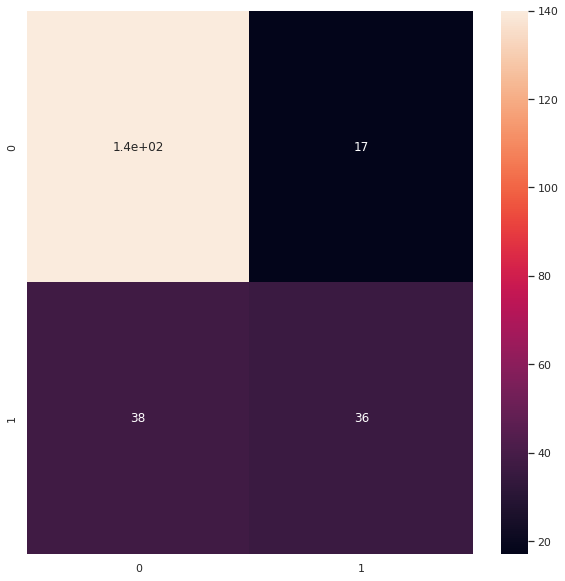

In [221]:
sns.heatmap(cm, annot=True)

Q7: Compute accuracy rate, true positive and true negative rate and comment on the performance.


In [222]:
from sklearn.metrics import accuracy_score
print("Accuracy is ", accuracy_score(y_test, y_pred))


Accuracy is  0.7619047619047619


Inference:The accuracy rate of the model is fairly descent

In [223]:
tn = cm[0,0]
fp = cm[0,1]
fn = cm[1,0]
tp = cm[1,1]
accuracy_rate = ((tp+tn)/(tp+tn+fn+fp))
acc_rate=accuracy_rate*100
print('The accuracy rate is: ' + str(acc_rate))

The accuracy rate is: 76.19047619047619


In [224]:
true_positive_rate = tp/(tp+fn)

print('The true positive rate is: ' + str(true_positive_rate))

The true positive rate is: 0.4864864864864865


In [225]:
true_negative_rate = tn/(tn+fp)

print('The true negative rate is: ' + str(true_negative_rate))

The true negative rate is: 0.89171974522293


Inference: Since we have more number of negative instances in the dataset, hence it is obvious that the true negativity rate is higher than true positivity rate , This suggests that the probability of predicting that the person is not diabetic are more

In [226]:
from sklearn import metrics
import matplotlib.pyplot as plt

In [227]:
from sklearn.metrics import roc_curve, roc_auc_score

Q8:Visualize the ROC curve, and comment on the performance of the classifier.

In [228]:
# ROC AUC
y_prob = classifier.predict_proba(X_test)[::, 1]
roc_auc_score(y_test, y_prob)

0.8077121707694956

Inference: Since the score is approximately equal to 0.8 , hence we can say that the performance of the classifier is fairly good

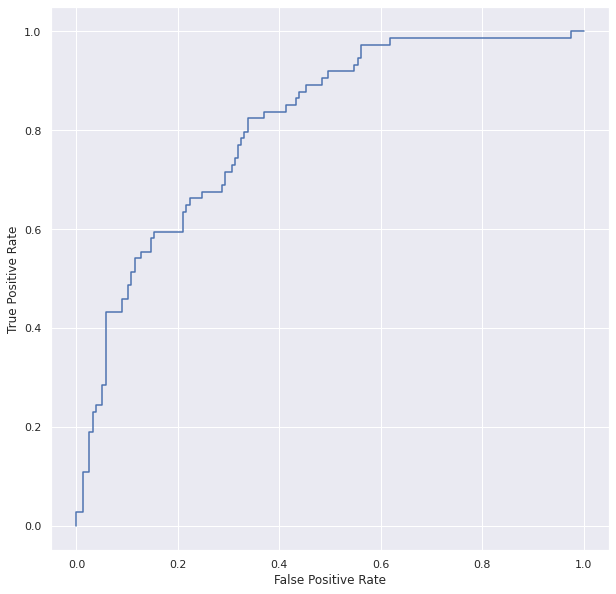

In [229]:
y_prob = classifier.predict_proba(X_test)[::, 1]
fpr, tpr, _ = metrics.roc_curve(y_test,y_prob)

plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Inference: Since the ROC curve lies in the upper left corner, it tells us that the model is a descent one because ROC curve corresponding to progressively greater discriminant capacity of diagnostic tests are located progressively closer to the upper lefthand corner in "ROC space"